<a href="https://colab.research.google.com/github/NehaCkumari/Coursera_Capstone/blob/master/Capstone_Project_The_Battle_of_Neighbourhoods_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Capstone Project-The Battle of Neighbourhoods *


*Indian Restaurants in hydrabad*

**Introduction**

Hyderabad is the capital of southern India's Telangana state. A major center for the technology industry, it's home to many upscale restaurants and shops. Its historic sites include Golconda Fort, a former diamond-trading center that was once the Qutb Shahi dynastic capital.

With it’s diverse culture , comes diverse food items. There are many restaurants in hydrabad, each belonging to different categories like Indian,Chinese , Italian , French etc.

This final project explores the best locations for Indian restaurants throughout the city of hydrabad.we are going to see an End to End Project kind thing on Zomato hydrabad Restaurant Descriptive Analytics and Predicting Rating for Each restaurant depends on its facilities and Features that each restaurant provides.

**Data**

Data used in the analysis are listed below:

1.Zomato dataset(containing restaurant id, name, city etc). 
2.Foursquare API to get venues' datas using for hydrabad city.
3.Foursquare API to get ratings, likes, tips for the Indian restraurant venues using venue id.

**Approach**


*   Collect the hydrabad city data from Zomato kaggel dataset
*   Using FourSquare API we will find all venues for each neighborhood.
*   Filter out all venues which venue category is Indian restaurant.
*   Using aggregative rating for each resturant to find the best places.
*   Visualize the Ranking of neighborhoods using folium library(python)







# **Problem Statement**



1.   What is / are the best location(s) for Indian cuisine in hydrabad City?
2.   Where would I go in hydrabad City to have the best Indian food?



Load Libraries

In [0]:
import os
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder

/bin/bash: conda: command not found


 zomato kaggle dataset

In [0]:
zomato_data=pd.read_csv('zomato.csv')

In [0]:
zomato_data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


to see whether the dataset contains the information about hydrabad city or not.

In [0]:
zomato_data["City"].unique().tolist()

['Makati City',
 'Mandaluyong City',
 'Pasay City',
 'Pasig City',
 'Quezon City',
 'San Juan City',
 'Santa Rosa',
 'Tagaytay City',
 'Taguig City',
 'Brasí_lia',
 'Rio de Janeiro',
 'Sí£o Paulo',
 'Albany',
 'Armidale',
 'Athens',
 'Augusta',
 'Balingup',
 'Beechworth',
 'Boise',
 'Cedar Rapids/Iowa City',
 'Chatham-Kent',
 'Clatskanie',
 'Cochrane',
 'Columbus',
 'Consort',
 'Dalton',
 'Davenport',
 'Des Moines',
 'Dicky Beach',
 'Dubuque',
 'East Ballina',
 'Fernley',
 'Flaxton',
 'Forrest',
 'Gainesville',
 'Hepburn Springs',
 'Huskisson',
 'Inverloch',
 'Lakes Entrance',
 'Lakeview',
 'Lincoln',
 'Lorn',
 'Macedon',
 'Macon',
 'Mayfield',
 'Mc Millan',
 'Middleton Beach',
 'Miller',
 'Monroe',
 'Montville',
 'Ojo Caliente',
 'Orlando',
 'Palm Cove',
 'Paynesville',
 'Penola',
 'Pensacola',
 'Phillip Island',
 'Pocatello',
 'Potrero',
 'Princeton',
 'Rest of Hawaii',
 'Savannah',
 'Singapore',
 'Sioux City',
 'Tampa Bay',
 'Tanunda',
 'Trentham East',
 'Valdosta',
 'Vernonia',
 'V

Name of the columns in the datset

In [0]:
zomato_data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

to extract only datas which belongs to hydrabad city

In [0]:
zomato_data=zomato_data.loc[zomato_data["City"]=="Hyderabad"]

In [0]:
zomato_data.shape

(18, 21)

In [0]:
zomato_data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,1.800000e+01,18.0,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,9.230824e+06,1.0,78.396257,17.432761,1361.111111,2.888889,4.344444,1340.833333
std,9.401260e+06,0.0,0.031352,0.014753,440.773236,0.471405,0.343378,1388.366762
min,9.074400e+04,1.0,78.329645,17.410371,500.000000,2.000000,3.800000,79.000000
25%,9.487100e+04,1.0,78.380981,17.424642,1125.000000,3.000000,4.100000,400.750000
50%,9.189076e+06,1.0,78.395628,17.430962,1450.000000,3.000000,4.250000,771.000000
75%,1.834560e+07,1.0,78.408115,17.440186,1725.000000,3.000000,4.675000,1913.750000
max,1.845286e+07,1.0,78.449654,17.459710,2000.000000,4.000000,4.900000,5434.000000


To find missing datas

In [0]:
zomato_data.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

there is no missing datas

In [0]:
hyd_data=zomato_data.drop(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality Verbose', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],axis=1)
hyd_data.shape

(18, 3)

We are only interested in locality and locations values so to further use it with foursquare api.

In [0]:
hyd_data.reset_index(drop=True, inplace=True)
hyd_data

,Locality,Longitude,Latitude
0,"12th Square Building, Banjara Hills",78.437225,17.410371
1,Banjara Hills,78.449654,17.412330
2,Banjara Hills,78.449578,17.422819
3,Gachibowli,78.329645,17.411028
4,Hitech City,78.386744,17.433809
5,Hitech City,78.375467,17.455894
6,Holiday Inn Express & Suites,78.347554,17.424114
7,Jubilee Hills,78.397865,17.438263
8,Jubilee Hills,78.408321,17.431668
9,Jubilee Hills,78.404423,17.428294


In [0]:
CLIENT_ID = 'HEDT2LU22MNOUYOPP1MI4QAJO3P3UJGLJHQES4WRTAD2FTKI' # your Foursquare ID
CLIENT_SECRET = 'PVQIVVDDTBSBPWIXR3VN4RZBEKTEIZQ2A0OYXEFKDEMCE5Q0' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 30

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HEDT2LU22MNOUYOPP1MI4QAJO3P3UJGLJHQES4WRTAD2FTKI
CLIENT_SECRET:PVQIVVDDTBSBPWIXR3VN4RZBEKTEIZQ2A0OYXEFKDEMCE5Q0


A function to get near by venues and its id in the locality

In [0]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            lat, 
            lng, 
            v['venue']['id'],
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'], 
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude',
                  'venue id', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [0]:
hyd_data_venues = getNearbyVenues(names=hyd_data['Locality'],
                                   latitudes=hyd_data['Latitude'],
                                   longitudes=hyd_data['Longitude']
                                  )

12th Square Building, Banjara Hills
Banjara Hills
Banjara Hills
Gachibowli
Hitech City
Hitech City
Holiday Inn Express & Suites
Jubilee Hills
Jubilee Hills
Jubilee Hills
Jubilee Hills
Jubilee Hills
Jubilee Hills
Jubilee Hills
Kondapur
Madhapur
Madhapur
Ohri' Hitech City


In [0]:
print(hyd_data_venues.shape)
hyd_data_venues

(341, 8)


,Locality,Neighborhood Latitude,Neighborhood Longitude,venue id,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"12th Square Building, Banjara Hills",17.410371,78.437225,4c4ef8b9f53d0f47ef9167a7,Zafraan Exotica,17.410325,78.437299,Indian Restaurant
1,"12th Square Building, Banjara Hills",17.410371,78.437225,5671790f498e9b15cfa21226,Mamagoto,17.410408,78.437340,Asian Restaurant
2,"12th Square Building, Banjara Hills",17.410371,78.437225,51fa7d4b498edce397284363,Chef Inam's Steak House,17.408716,78.438714,Steakhouse
3,"12th Square Building, Banjara Hills",17.410371,78.437225,4bcf762a0ffdce72dc81b2c0,Ohris Banjara,17.408381,78.438940,Indian Restaurant
4,"12th Square Building, Banjara Hills",17.410371,78.437225,4df4d6edae609e69dd9e476d,Ohri's Far East,17.408342,78.438935,Chinese Restaurant
...,...,...,...,...,...,...,...,...
336,Ohri' Hitech City,17.450851,78.379347,5042418fe4b07ecdea580045,Shilparamam Night Bazaar,17.452976,78.379120,Market
337,Ohri' Hitech City,17.450851,78.379347,4b68273af964a5206c692be3,Deloitte,17.447976,78.376221,Office
338,Ohri' Hitech City,17.450851,78.379347,4fcb7504e4b067457c768cf6,All Seasons Multicuisine Restaurant,17.447249,78.378243,Middle Eastern Restaurant
339,Ohri' Hitech City,17.450851,78.379347,4e4ce69a63655f206fe380aa,Shamrock - the Irish Bar,17.447274,78.378380,Pub


In [0]:
hyd_data_venues["Venue Category"].value_counts()

Indian Restaurant         48
Café                      23
Fast Food Restaurant      14
Coffee Shop               14
Restaurant                10
                          ..
Chaat Place                1
Furniture / Home Store     1
Market                     1
Office                     1
Dumpling Restaurant        1
Name: Venue Category, Length: 89, dtype: int64

As Indian restaurant is maximum in number so we will examine Indian restaurant in the city.

In [0]:
hyd_data_venues=hyd_data_venues[hyd_data_venues["Venue Category"]=="Indian Restaurant"]
hyd_data_venues.reset_index(drop=True, inplace=True)
hyd_data_venues.head()

,Locality,Neighborhood Latitude,Neighborhood Longitude,venue id,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"12th Square Building, Banjara Hills",17.410371,78.437225,4c4ef8b9f53d0f47ef9167a7,Zafraan Exotica,17.410325,78.437299,Indian Restaurant
1,"12th Square Building, Banjara Hills",17.410371,78.437225,4bcf762a0ffdce72dc81b2c0,Ohris Banjara,17.408381,78.438940,Indian Restaurant
2,"12th Square Building, Banjara Hills",17.410371,78.437225,4f4bb574e4b037cdb8f76ed1,Sitara Grand,17.407583,78.440431,Indian Restaurant
3,"12th Square Building, Banjara Hills",17.410371,78.437225,4e9ac2dbbe7bc875aa9c71d6,Tadka,17.408467,78.439094,Indian Restaurant
4,Banjara Hills,17.412330,78.449654,4cf0e66088de3704a3c96e2b,Sarvi,17.412698,78.449704,Indian Restaurant


In [0]:
hyd_ind_res=hyd_data_venues.drop(['Neighborhood Latitude','Neighborhood Longitude','Venue Latitude','Venue Longitude','Venue Category'],axis=1)
hyd_ind_res.tail()

,Locality,venue id,Venue
43,Madhapur,513757e1e4b053656597e530,Spice Tribe
44,Madhapur,4c7e617f18bc199c8966de58,Hyderabad House
45,Madhapur,512b8f13e4b0ce6673f7ffc1,Palamuru Grill
46,Ohri' Hitech City,4dd929a3d22d38ef4311e530,Paradise Restaurant
47,Ohri' Hitech City,4cc2a26fd43ba1431b165af8,Gur nihal dhaba


A function to get likes, ratings, tips from venue id using foursquare api .

In [0]:
def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [0]:
column_names=['Locality','ID','Name','Likes','Rating','Tips']
indian_rest_stats_hyd=pd.DataFrame(columns=column_names)
count=1
for row in hyd_ind_res.values.tolist():
    Locality,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(hyd_ind_res),')','processed')
    indian_rest_stats_hyd = indian_rest_stats_hyd.append({'Locality': Locality, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1
indian_rest_stats_hyd.tail()
                                  

{'meta': {'code': 200, 'requestId': '5e21ad7795feaf001b7c3c23'}, 'response': {'venue': {'id': '4c4ef8b9f53d0f47ef9167a7', 'name': 'Zafraan Exotica', 'contact': {}, 'location': {'address': 'Rd #12 Banjara Hills', 'lat': 17.41032532519568, 'lng': 78.4372992545256, 'labeledLatLngs': [{'label': 'display', 'lat': 17.41032532519568, 'lng': 78.4372992545256}], 'cc': 'IN', 'city': 'Hyderabad', 'state': 'Telangana', 'country': 'India', 'formattedAddress': ['Rd #12 Banjara Hills', 'Hyderabad', 'Telangana', 'India']}, 'canonicalUrl': 'https://foursquare.com/v/zafraan-exotica/4c4ef8b9f53d0f47ef9167a7', 'categories': [{'id': '4bf58dd8d48988d10f941735', 'name': 'Indian Restaurant', 'pluralName': 'Indian Restaurants', 'shortName': 'Indian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 28}, 'price': {'tier': 2, 'message': 'Moderate', 'currency': '₹'}, 'likes': {'count': 61, 'groups': [{'type': '

,Locality,ID,Name,Likes,Rating,Tips
43,Madhapur,513757e1e4b053656597e530,Spice Tribe,4,6.0,7
44,Madhapur,4c7e617f18bc199c8966de58,Hyderabad House,3,5.7,4
45,Madhapur,512b8f13e4b0ce6673f7ffc1,Palamuru Grill,26,6.5,16
46,Ohri' Hitech City,4dd929a3d22d38ef4311e530,Paradise Restaurant,175,7.0,71
47,Ohri' Hitech City,4cc2a26fd43ba1431b165af8,Gur nihal dhaba,8,6.9,2


In [0]:
indian_rest_stats_hyd.head()

,Locality,ID,Name,Likes,Rating,Tips
0,"12th Square Building, Banjara Hills",4c4ef8b9f53d0f47ef9167a7,Zafraan Exotica,61,8.3,28
1,"12th Square Building, Banjara Hills",4bcf762a0ffdce72dc81b2c0,Ohris Banjara,99,7.5,42
2,"12th Square Building, Banjara Hills",4f4bb574e4b037cdb8f76ed1,Sitara Grand,6,6.5,3
3,"12th Square Building, Banjara Hills",0,0,0,0.0,0
4,Banjara Hills,4cf0e66088de3704a3c96e2b,Sarvi,76,8.0,32


In [0]:
hyd_locality_stats=indian_rest_stats_hyd.groupby('Locality',as_index=False).mean()[['Locality','Rating']]
hyd_locality_stats.columns=['locality','Average Rating']
hyd_locality_stats.sort_values(['Average Rating'],ascending=False).head(10)

,locality,Average Rating
1,Banjara Hills,7.066667
4,Jubilee Hills,7.033333
7,Ohri' Hitech City,6.950000
6,Madhapur,6.375000
5,Kondapur,6.150000
3,Holiday Inn Express & Suites,5.800000
0,"12th Square Building, Banjara Hills",5.575000
2,Hitech City,3.425000


In [0]:

hyd_locality_stats = pd.merge(left = hyd_locality_stats, right = hyd_data_venues, left_on = 'locality', right_on = 'Locality')
hyd_locality_stats = hyd_locality_stats.drop('Neighborhood Latitude', axis = 1)
hyd_locality_stats = hyd_locality_stats.drop('Neighborhood Longitude', axis = 1)
hyd_locality_stats = hyd_locality_stats.drop('Venue Category', axis = 1)
hyd_locality_stats = hyd_locality_stats.drop('locality', axis = 1)
hyd_locality_stats = hyd_locality_stats.drop('venue id', axis = 1)
hyd_locality_stats.head()

,Average Rating,Locality,Venue,Venue Latitude,Venue Longitude
0,5.575000,"12th Square Building, Banjara Hills",Zafraan Exotica,17.410325,78.437299
1,5.575000,"12th Square Building, Banjara Hills",Ohris Banjara,17.408381,78.438940
2,5.575000,"12th Square Building, Banjara Hills",Sitara Grand,17.407583,78.440431
3,5.575000,"12th Square Building, Banjara Hills",Tadka,17.408467,78.439094
4,7.066667,Banjara Hills,Sarvi,17.412698,78.449704


In [0]:
X=hyd_locality_stats.drop('Locality',axis=1)
X=X.drop('Venue',axis=1)
X

,Average Rating,Venue Latitude,Venue Longitude
0,5.575000,17.410325,78.437299
1,5.575000,17.408381,78.438940
2,5.575000,17.407583,78.440431
3,5.575000,17.408467,78.439094
4,7.066667,17.412698,78.449704
5,7.066667,17.414802,78.449117
6,7.066667,17.412148,78.449761
7,7.066667,17.414455,78.450545
8,7.066667,17.409690,78.449669
9,7.066667,17.415801,78.449260


To find the best value of K using elbow technique

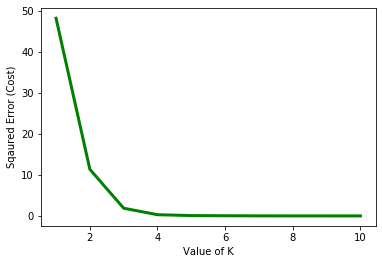

In [0]:
from matplotlib import style 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs
cost =[] 
for i in range(1, 11): 
	KM = KMeans(n_clusters = i, max_iter = 500) 
	KM.fit(X) 
	
	# calculates squared error 
	# for the clustered points 
	cost.append(KM.inertia_)	 

# plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 

# the point of the elbow is the 
# most optimal value for choosing k 

In [0]:
# set number of clusters
kclusters = 4

hyd_data_venues_grouped_clustering  = hyd_locality_stats.drop('Locality', 1)
hyd_data_venues_grouped_clustering  = hyd_data_venues_grouped_clustering .drop('Venue', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(hyd_data_venues_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 3, 3, 3, 2, 2, 2, 2, 2, 2], dtype=int32)

In [0]:
# add clustering labels
hyd_locality_stats.insert(0, 'Cluster Labels', kmeans.labels_)
hyd_locality_stats.head()

,Cluster Labels,Average Rating,Locality,Venue,Venue Latitude,Venue Longitude
0,3,5.575000,"12th Square Building, Banjara Hills",Zafraan Exotica,17.410325,78.437299
1,3,5.575000,"12th Square Building, Banjara Hills",Ohris Banjara,17.408381,78.438940
2,3,5.575000,"12th Square Building, Banjara Hills",Sitara Grand,17.407583,78.440431
3,3,5.575000,"12th Square Building, Banjara Hills",Tadka,17.408467,78.439094
4,2,7.066667,Banjara Hills,Sarvi,17.412698,78.449704


In [0]:
address = 'Hyderabad'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Hyderabad are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Hyderabad are 17.38878595, 78.46106473453146.


In [0]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for rating,venue,lat, lon, poi, cluster in zip(hyd_locality_stats['Average Rating'],hyd_locality_stats['Venue'],hyd_locality_stats['Venue Latitude'], hyd_locality_stats['Venue Longitude'], hyd_locality_stats['Locality'], hyd_locality_stats['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [0]:
hyd_locality_stats.loc[hyd_locality_stats['Cluster Labels'] == 0, hyd_locality_stats.columns[[1] + list(range(0, hyd_locality_stats.shape[1]))]]

,Average Rating,Cluster Labels,Average Rating,Locality,Venue,Venue Latitude,Venue Longitude
30,6.150,0,6.150,Kondapur,Grand Four Seasons,17.457885,78.371674
31,6.150,0,6.150,Kondapur,Santosh Dhaba,17.461610,78.366815
32,6.150,0,6.150,Kondapur,Punjabi Affairs,17.462752,78.367128
33,6.150,0,6.150,Kondapur,Angaara - Kebabs On Charcoal,17.459608,78.366294
34,6.150,0,6.150,Kondapur,Kerala Kitchen,17.462138,78.366877
35,6.150,0,6.150,Kondapur,Haveli Restaurant & Bar,17.462941,78.368653
36,6.150,0,6.150,Kondapur,Blue Fox,17.458193,78.371182
37,6.150,0,6.150,Kondapur,The Spice Village,17.461806,78.366987
38,6.375,0,6.375,Madhapur,Abhiruchi,17.437882,78.390034
39,6.375,0,6.375,Madhapur,Sanjha Chulha,17.441395,78.388774


In [0]:
hyd_locality_stats.loc[hyd_locality_stats['Cluster Labels'] == 1, hyd_locality_stats.columns[[1] + list(range(0, hyd_locality_stats.shape[1]))]]

,Average Rating,Cluster Labels,Average Rating,Locality,Venue,Venue Latitude,Venue Longitude
13,3.425,1,3.425,Hitech City,4 seasons,17.434258,78.386713
14,3.425,1,3.425,Hitech City,Grand Four Seasons,17.457885,78.371674
15,3.425,1,3.425,Hitech City,Pine and Dine,17.455701,78.375538
16,3.425,1,3.425,Hitech City,Rock 'N' Grill,17.453501,78.378203


Cluster 1 has lowest ratings means these are not that good restaurant to visit for Indian food in hydrabad.

In [0]:
hyd_locality_stats.loc[hyd_locality_stats['Cluster Labels'] == 2, hyd_locality_stats.columns[[1] + list(range(0, hyd_locality_stats.shape[1]))]]

,Average Rating,Cluster Labels,Average Rating,Locality,Venue,Venue Latitude,Venue Longitude
4,7.066667,2,7.066667,Banjara Hills,Sarvi,17.412698,78.449704
5,7.066667,2,7.066667,Banjara Hills,Sahib Sindh Sultan,17.414802,78.449117
6,7.066667,2,7.066667,Banjara Hills,Tabla - The Food Beat,17.412148,78.449761
7,7.066667,2,7.066667,Banjara Hills,Angeethi,17.414455,78.450545
8,7.066667,2,7.066667,Banjara Hills,Silver Salt,17.409690,78.449669
9,7.066667,2,7.066667,Banjara Hills,Angeethi,17.415801,78.449260
10,7.066667,2,7.066667,Banjara Hills,Roll Call,17.426170,78.448107
11,7.066667,2,7.066667,Banjara Hills,Khan Saab,17.418665,78.448428
12,7.066667,2,7.066667,Banjara Hills,Shanbhag Samarth Restaurant,17.426235,78.450694
18,7.033333,2,7.033333,Jubilee Hills,Daspalla,17.436931,78.398656


Cluster 2 has highest ratings means these are the best restaurant to visit for Indian food in hydrabad.

In [0]:
hyd_locality_stats.loc[hyd_locality_stats['Cluster Labels'] == 3, hyd_locality_stats.columns[[1] + list(range(0, hyd_locality_stats.shape[1]))]]

,Average Rating,Cluster Labels,Average Rating,Locality,Venue,Venue Latitude,Venue Longitude
0,5.575,3,5.575,"12th Square Building, Banjara Hills",Zafraan Exotica,17.410325,78.437299
1,5.575,3,5.575,"12th Square Building, Banjara Hills",Ohris Banjara,17.408381,78.438940
2,5.575,3,5.575,"12th Square Building, Banjara Hills",Sitara Grand,17.407583,78.440431
3,5.575,3,5.575,"12th Square Building, Banjara Hills",Tadka,17.408467,78.439094
17,5.800,3,5.800,Holiday Inn Express & Suites,Khaa Ke Dekh,17.422712,78.347562
